<a href="https://colab.research.google.com/github/ArslanUllahKhan1/Netflix_Movies_TV_Shows_Clustering/blob/main/Netflix_Movies_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mounting the Drive to load data
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
netflix_data = pd.read_csv('/content/drive/MyDrive/Dataset/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv') #Loading the data.


In [6]:
# Getting head
netflix_data.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [8]:
# tail
netflix_data.tail(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
#names of our columns
for x in list(netflix_data.columns[0:]):
    print(x)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [10]:
# Getting shape of the data.
netflix_data.shape


(7787, 12)

In [11]:
# More info about the data.
netflix_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [12]:
#check if there any missing values
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
# Looking for null percentage.
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of the null values in {col} : {null_rate}%')


Percentage of the null values in director : 30.679337357133683%
Percentage of the null values in cast : 9.220495697958135%
Percentage of the null values in country : 6.51085141903172%
Percentage of the null values in date_added : 0.1284191601386927%
Percentage of the null values in rating : 0.08989341209708489%


In [14]:
netflix_data.duplicated().sum() # Checking for duplicated entries.

0

In [15]:
netflix_data.describe(include='all') # Statistical info of the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [16]:
#describe our  Categorical Data
netflix_data.describe(include=[object])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


##Data Cleaning
###Replacing the null values.



In [17]:
netflix_data.date_added.isnull().sum() # Number of null values in date_added.

10

In [18]:

netflix_data.rating.isnull().sum() # Number of null values in rating.

7

In [19]:
netflix_data.dropna(subset=['date_added','rating'],inplace=True) #Dropping the null values


In [20]:
netflix_data.shape # Checking the shape of our data.

(7770, 12)

#####Rest of the columns which contains null values, we will be handle accordingly in future analyses.


###Adding Datetime Features

In [21]:
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])  # converting the date_added to date time format.
netflix_data['day_added'] = netflix_data['date_added'].dt.day            # Computing the day.
netflix_data['month_added'] = netflix_data['date_added'].dt.month        # Computing the month.
netflix_data['year_added'] = netflix_data['date_added'].dt.year          # Computing the year.

#**EDA**

In [22]:
#importing the libraries
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
from collections import Counter
from nltk.corpus import stopwords

In [23]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [24]:
!pip install yellowbrick
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 166 kB/s 


###Content Type On Netflix:


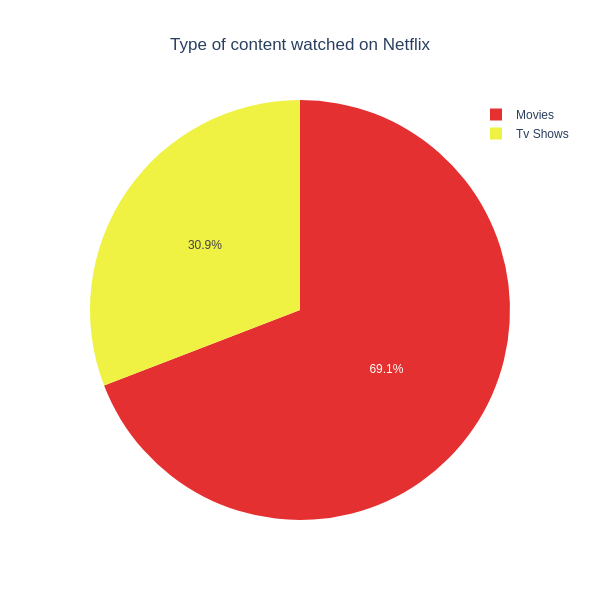

In [25]:
# Pie chart for type of content.
colors = ['	#eff242', '	#e43030']
labels = ['Tv Shows', 'Movies']
tv_shows = netflix_data.type.value_counts()[1]
movies = netflix_data.type.value_counts()[0]

content_watched = go.Figure(data=[go.Pie(labels=labels, values=[tv_shows, movies])])
content_watched.update_layout(title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=600, width=600)
content_watched.update_traces(marker=dict(colors=colors))

content_watched.show('png')

###Content available on Netflix are:

###TV Shows = 30.9% 

###Movies =  69.1%



### Content Growth Over Years


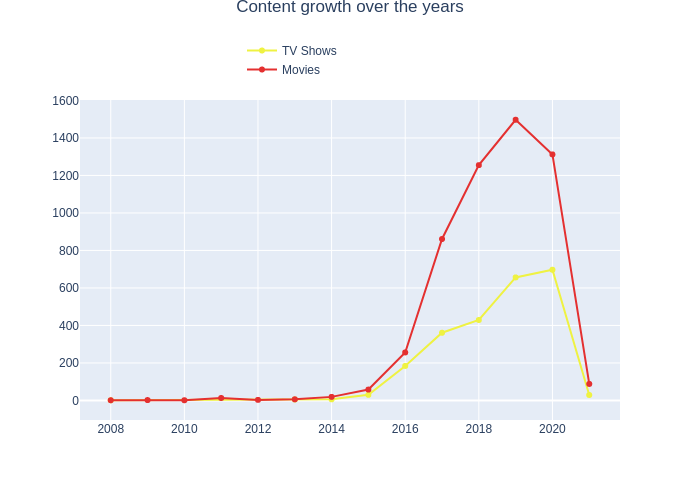

In [26]:
# Plot growth of the contents over the years.
tv_shows = netflix_data[netflix_data["type"] == "TV Show"]
movies = netflix_data[netflix_data["type"] == "Movie"]

col = "year_added"

tv_show_content_1 = tv_shows[col].value_counts().reset_index()
tv_show_content_1 = tv_show_content_1.rename(columns = {col : "count", "index" : col})
tv_show_content_1 = tv_show_content_1.sort_values(col)

movie_content_1 = movies[col].value_counts().reset_index()
movie_content_1 = movie_content_1.rename(columns = {col : "count", "index" : col})
movie_content_1 = movie_content_1.sort_values(col)

trace1 = go.Scatter(x=tv_show_content_1[col], y=tv_show_content_1["count"], name="TV Shows", marker=dict(color="#eff242"))
trace2 = go.Scatter(x=movie_content_1[col], y=movie_content_1["count"], name="Movies", marker=dict(color="#e43030"))

data = [trace1, trace2]
layout = go.Layout(title="Content growth over the years",title_x=0.5,title_y=1, legend=dict(x=0.3, y=1.2, orientation="v"))
content_watched = go.Figure(data, layout=layout)

content_watched.write_image("images/content_growth_over_year.png", scale=4)
content_watched.show('png')


- From 2017 we can see growth in the number of movies on netflix is much higher than tv shows.

- From the graph we can say that highest number of movies and tv shows got added in 2019 and 2020.

- In 2019 and 2020 number of movies are almost double than tv shows.

- From 2015 the number of movies and tv shown uploaded on netflix is increased considerably

##In which month do most movies and tv shows get added


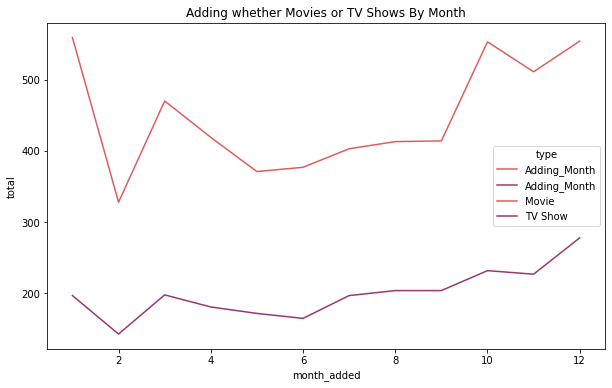

In [27]:
monthly_data_netflix=netflix_data.groupby(['month_added',"type"])["title"].count().reset_index(name='total')
plt.figure(figsize=[10,6])
plt.title("Adding whether Movies or TV Shows By Month")
sns.lineplot(data=monthly_data_netflix,x="month_added",y="total",hue="type",palette="flare",markers=True, dashes=False,label="Adding_Month")
plt.show()

 - Most of the content is uploaded either by year ending or beginning.

- October, November, December, and January are months in which many shows and movies get uploaded to the platform.


##Country

###Now lets see which country produced how much contents.


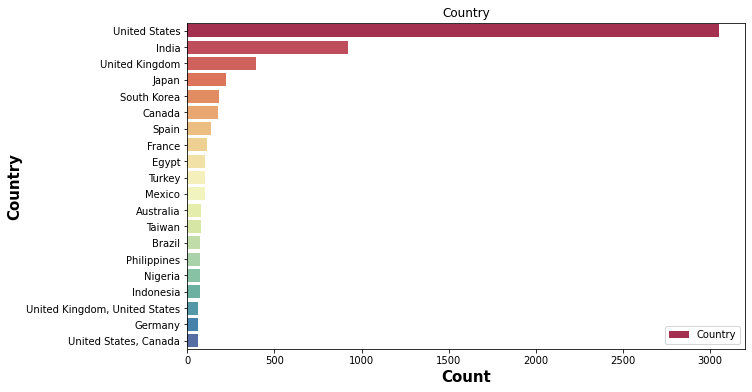

In [28]:
netflix_data['country'].fillna('United States', inplace=True)
plt.figure(figsize=(10,6))
sns.barplot(data=netflix_data,y=netflix_data["country"].value_counts().iloc[:20].index,x=netflix_data["country"].value_counts().iloc[:20]
            ,palette="Spectral",label="Country")
plt.title('Country')
plt.xlabel("Count",fontweight ='bold', fontsize = 15)
plt.ylabel("Country",fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

####**-**The United States ranked first in terms of the number of movies and TV shows available, followed by India.



###To be more precise, let's split the data into two parts, one part TV shows and one part movies, to see which countries produce the most amount of this work.



In [29]:
# Splitting the data
movie_data=netflix_data[netflix_data["type"]=="Movie"]
tv_show_data=netflix_data[netflix_data["type"]=="TV Show"]

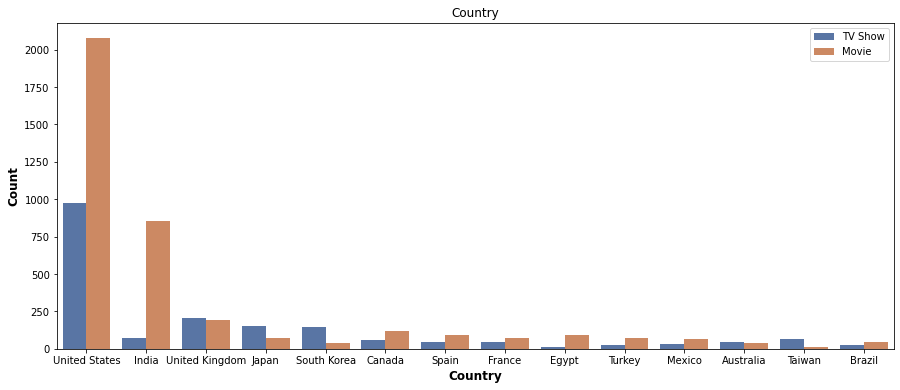

In [30]:
# Plotting the graph country wise based of Tv Shows and Movies
plt.figure(figsize=(15,6))
sns.countplot(netflix_data["country"],hue = netflix_data["type"],
              order = netflix_data["country"].value_counts().index[:14], data = netflix_data, palette = 'deep')
plt.title('Country')
plt.ylabel("Count",fontweight ='bold', fontsize = 12)
plt.xlabel("Country",fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

- The United States is a leading producer of both types of content followed by India and UK.
- TV Shows are more frequent in South Korea.

##Director:

###Which directors have most number of the movies and tv shows?



In [31]:
netflix_data['director']=netflix_data['director'].fillna('') # Replace the null values in director.

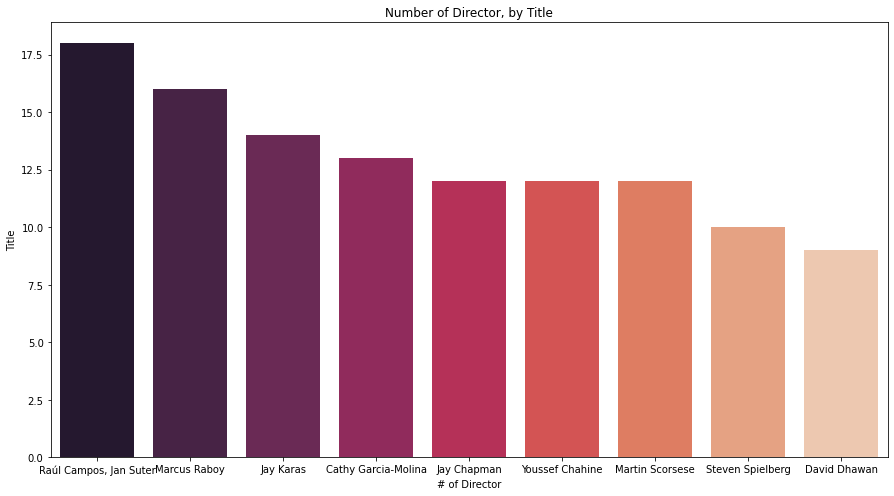

In [32]:
data_director=netflix_data.groupby("director")["title"].count().sort_values(ascending=False).iloc[1:10].reset_index(name="total")
plt.figure(figsize=[15,8])
sns.barplot(data=data_director,x=data_director["director"],y=data_director["total"],palette="rocket")
plt.title('Number of Director, by Title')
plt.ylabel('Title')
plt.xlabel('# of Director')
plt.show()

Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows.



## Wordcloud

##Wordcloud to see which words appear the most in the titles for movies and tv shows.


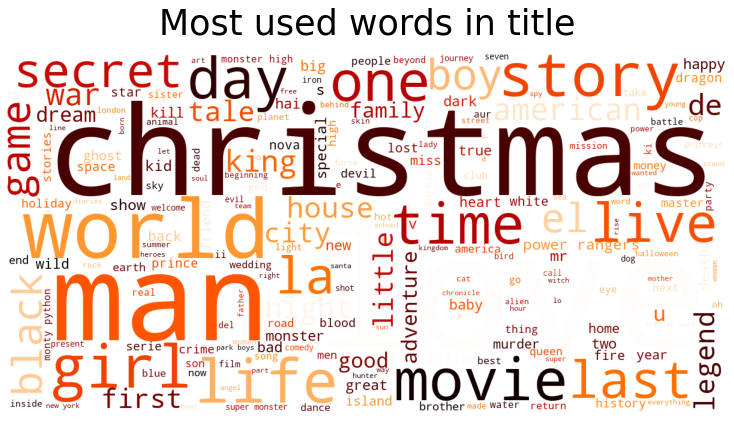

In [33]:
# Import the required libraries.
from wordcloud import STOPWORDS, WordCloud 

# Create a string to store all the words.
commented_word = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in netflix_data.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    commented_word += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(commented_word)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.title('Most used words in title', fontsize = 35, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


- Most repeated words in title include Christmas, Love, Story, Man and World.

### Wordcloud to see which word appeared most in description.


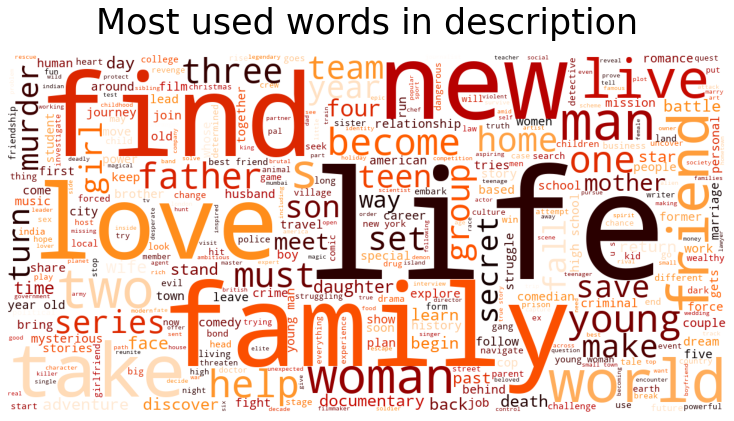

In [34]:
# Create a string to store all the words.
commented_word = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)
 
# iterate through the column.
for val in netflix_data.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    commented_word += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(commented_word)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.title('Most used words in description', fontsize = 35, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


-Most occurring words in the description of the tv shows and movies are Family, Life, Find, Take, World, Love, Woman, Friend.


##Now lets take a look about a Genre


In [35]:
data_genre=netflix_data["listed_in"].str.split(",",expand=True)
data_genre=data_genre[0].append([data_genre[1],data_genre[2]],ignore_index=False)
data_genre=data_genre.value_counts().sort_values(ascending=False).iloc[:20]
data_genre=data_genre.reset_index(name="total")
data_genre=data_genre.rename(columns={"index":"listed_in"})

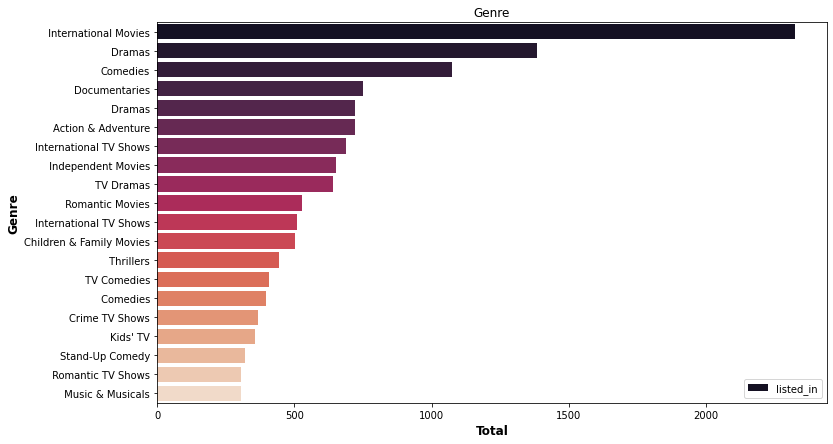

In [36]:
#plotting a barplot for genre
plt.figure(figsize=(12,7))
sns.barplot(data=data_genre,y=data_genre["listed_in"],x=data_genre["total"]
            ,palette="rocket",label="listed_in")
plt.title('Genre')
plt.xlabel("Total",fontweight ='bold', fontsize = 12)
plt.ylabel("Genre",fontweight ='bold', fontsize = 12)
plt.legend()
plt.show()

The top three genre that are present on Netflix are:

*   International Movies
*   Dramas
*   Comedies





###Duration:


In [37]:
# Creating subsets for tv shows and movies.
netflix_tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
netflix_movies = netflix_data[netflix_data['type'] == 'Movie']

duration_tv_shows = netflix_tv_shows['duration'].reset_index() # Select the durations for tv shows
duration_movies = netflix_movies['duration'].reset_index() # Select the durations for movies

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

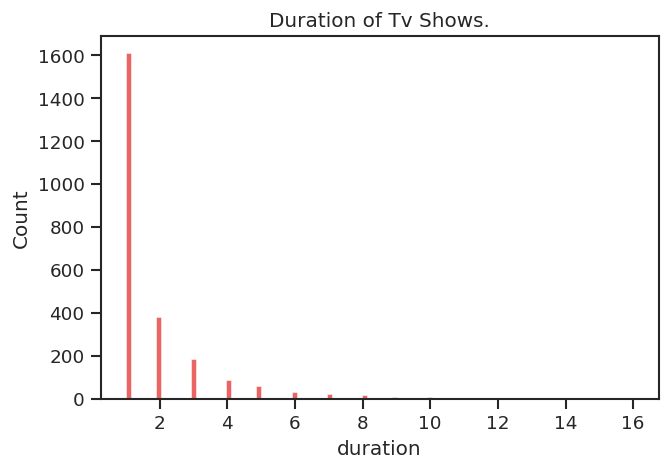

In [38]:
# Ploting the durations of Tv Shows.
plt.figure(figsize=(6,4), dpi=120)
sns.set(style="ticks")
sns.histplot(data=duration_tv_shows['duration'], color='#e43030')
plt.title('Duration of Tv Shows.')
plt.show()

- Most of the Tv Shows last for 1 season.
- Very rare for Tv show to last more than 5 seasons.


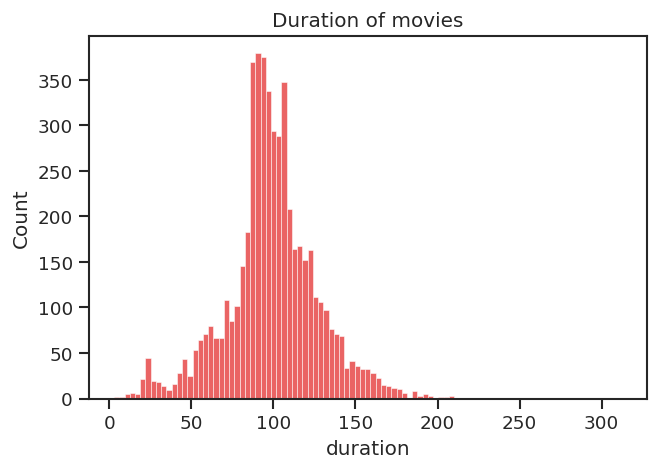

In [39]:
# Ploting the durations of Movies.
plt.figure(figsize=(6,4), dpi=120)
sns.set(style="ticks")
sns.histplot(data=duration_movies['duration'], color='#e43030')
plt.title('Duration of movies')
plt.show()

- The average length of movies is between 90 to 120 minutes.

##Rating:

Netflix sets maturity ratings by the frequency and impact of mature content in a title, such as the amount of violence, sex, adult language, nudity, or substance use that may be present.



Text(0, 0.5, 'Counts')

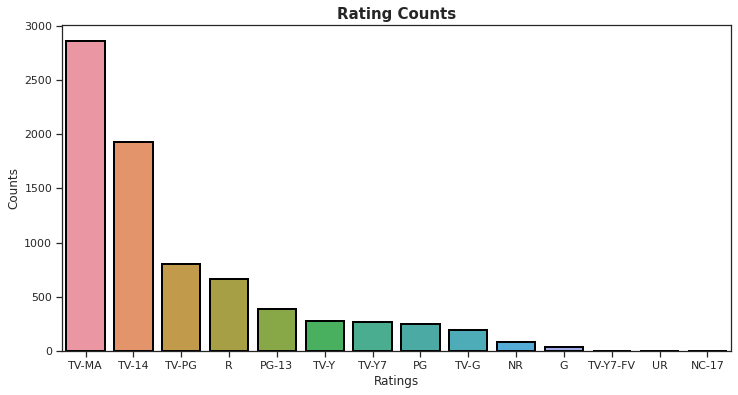

In [40]:
# Plotting the countplot for the ratings
plt.figure(figsize=(12,6))
sns.set(style="ticks")
ax=sns.countplot('rating',data=netflix_data,lw=2, ec='black',
                  order = netflix_data['rating'].value_counts().index)
plt.title('Rating Counts', fontsize=15,fontweight='bold')
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Counts',fontsize=12)

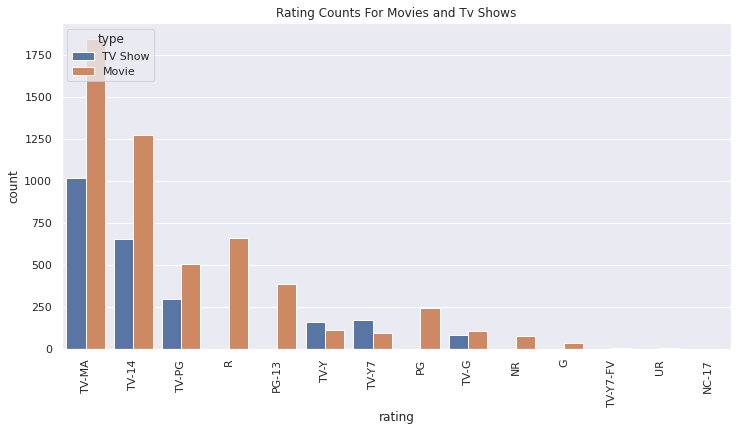

In [41]:
#Plotting on a comparison plot
sns.set()
plt.figure(figsize=(12,6))
ax=sns.countplot(x="rating",data= netflix_data,hue= "type",order = netflix_data['rating'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.title("Rating Counts For Movies and Tv Shows")
plt.show()

- TV-MA tops the charts, indicating that mature content is more popular on Netflix.

- This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.

- Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

#Data Preprocessing:


In [42]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
#Replace the null values in cast.
netflix_data['cast']=netflix_data['cast'].fillna('')

###Text columns to create clusters


In [75]:
cluster_dataframe = netflix_data[['title']]
cluster_dataframe['cluster_data'] = (netflix_data['description'] + ' ' + netflix_data['listed_in'] + ' ' + netflix_data['director'] + ' ' + netflix_data['cast'] + ' ' + netflix_data['country'] + ' ' + netflix_data['rating']).astype(str)
cluster_dataframe.set_index('title', inplace = True)
cluster_dataframe.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [76]:
# Remove punctuation from the text.
def rem_punc(text): # function for removing punctuation
    import string 
    trans = str.maketrans('', '', string.punctuation)
    return text.translate(trans)
    
cluster_dataframe['cluster_data'] = cluster_dataframe['cluster_data'].apply(rem_punc)
cluster_dataframe.head(5)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,When an army recruit is found dead his fellow ...
9,In a postapocalyptic world ragdoll robots hide...
21,A brilliant group of students become cardcount...


In [77]:
stop_words = set(stopwords.words('english'))


In [78]:
# Removing the stopwords.
def stopword(text): # function for removing the stopword
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_dataframe['cluster_data'] = cluster_dataframe['cluster_data'].apply(stopword)
cluster_dataframe.cluster_data.head(5)

title
3%       future elite inhabit island paradise far crowd...
7:19     devastating earthquake hits mexico city trappe...
23:59    army recruit found dead fellow soldiers forced...
9        postapocalyptic world ragdoll robots hide fear...
21       brilliant group students become cardcounting e...
Name: cluster_data, dtype: object

In [79]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [80]:
cluster_dataframe['cluster_data'] = cluster_dataframe['cluster_data'].apply(stemming)
cluster_dataframe.head(5)

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...
23:59,armi recruit found dead fellow soldier forc co...
9,postapocalypt world ragdol robot hide fear dan...
21,brilliant group student becom cardcount expert...


In [81]:
bag_of_words = cluster_dataframe.cluster_data


##Create Clusters:


In [82]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)
print(X.shape)


(7770, 20000)


In [83]:
t_vectorizer.get_feature_names_out()


array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

###Dimensionality Reduction:


In [53]:
pca = PCA()
pca.fit(X.toarray())

PCA()

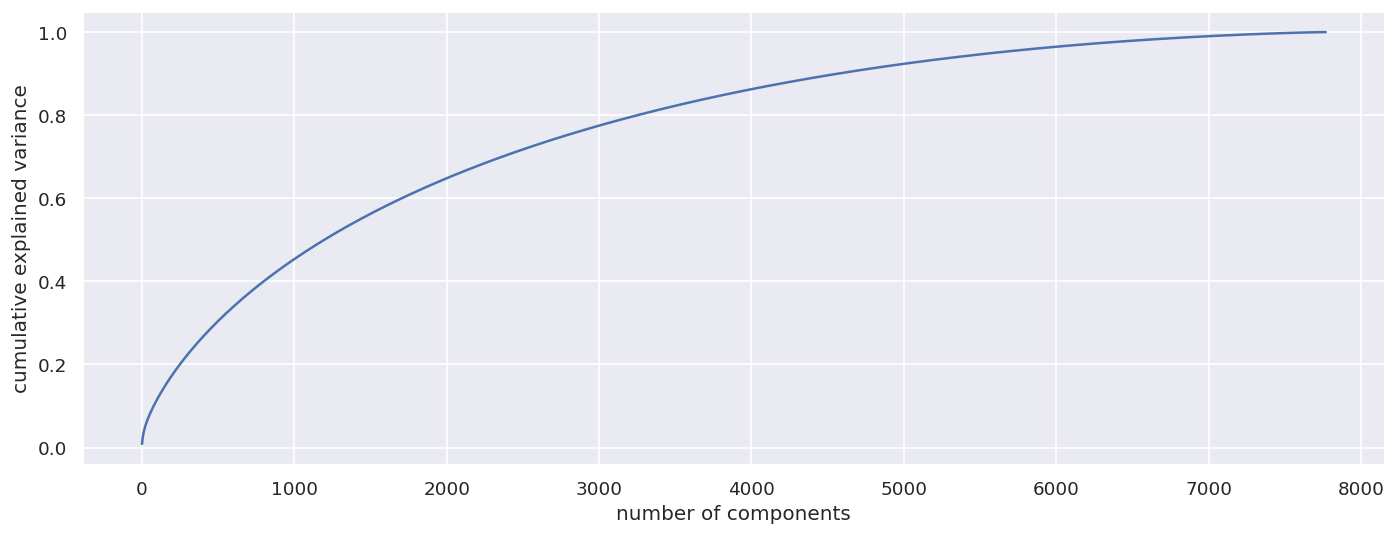

In [54]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- Almost 95% of the variance can be explained by 5000 components.

In [55]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5591)

In [56]:
X_transformed


array([[ 0.12381384,  0.01878768, -0.01985089, ..., -0.01290126,
        -0.0061675 ,  0.00134415],
       [-0.03957416,  0.03685093, -0.00068804, ...,  0.01741727,
        -0.00170697,  0.00722743],
       [-0.04426074,  0.04240966, -0.03652511, ...,  0.00155654,
         0.00456558, -0.00629564],
       ...,
       [-0.08081921, -0.0809065 ,  0.27382203, ...,  0.00364216,
        -0.00489299,  0.01251322],
       [ 0.10148378, -0.00405508,  0.01560673, ..., -0.00551716,
        -0.01236381,  0.01055393],
       [-0.09251356, -0.20593119,  0.35063681, ..., -0.00786756,
         0.00438817,  0.00044112]])

###Get optimum K value using Metric:Shilhouette.


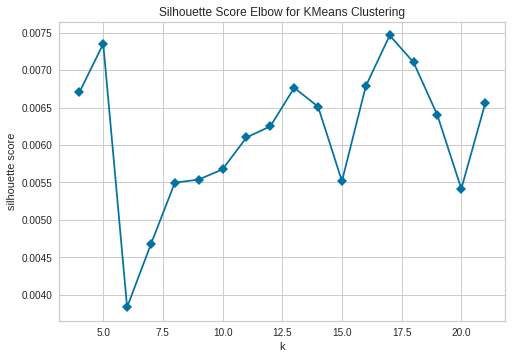

In [57]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

For n_clusters = 2, silhouette score is 0.0047721176143510746


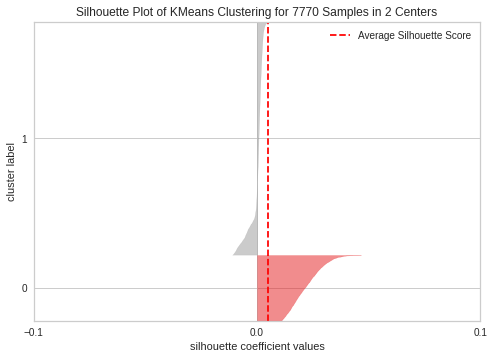

For n_clusters = 3, silhouette score is 0.005919120526288965


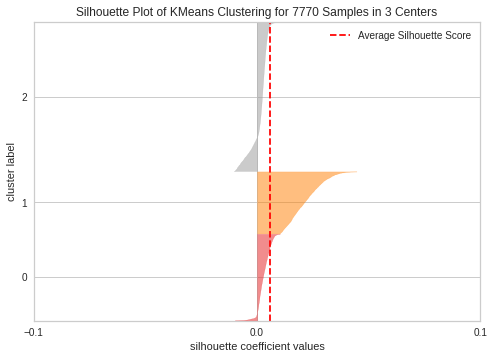

For n_clusters = 4, silhouette score is 0.00670274740576397


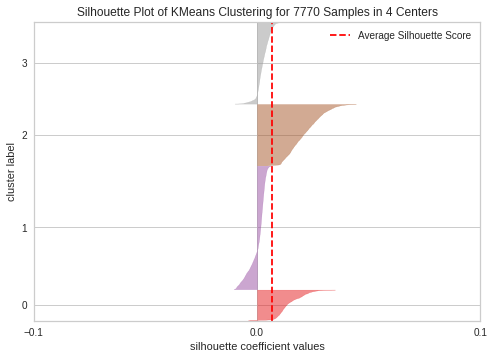

For n_clusters = 5, silhouette score is 0.007350213894115626


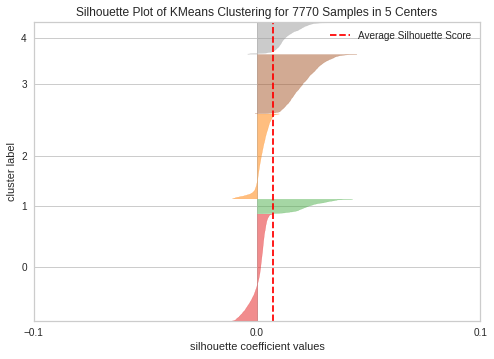

For n_clusters = 6, silhouette score is 0.003833635359469857


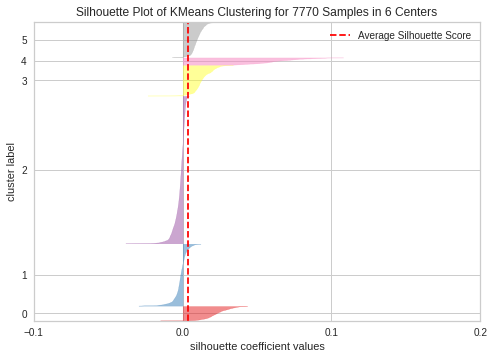

For n_clusters = 7, silhouette score is 0.00467803783104266


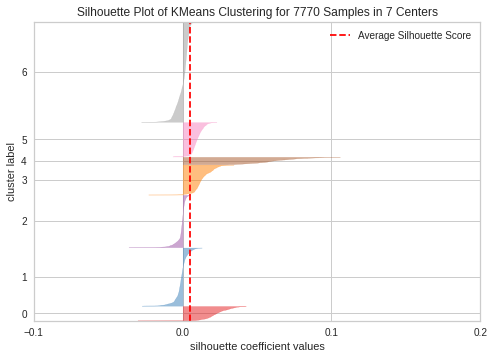

For n_clusters = 8, silhouette score is 0.00549681474120132


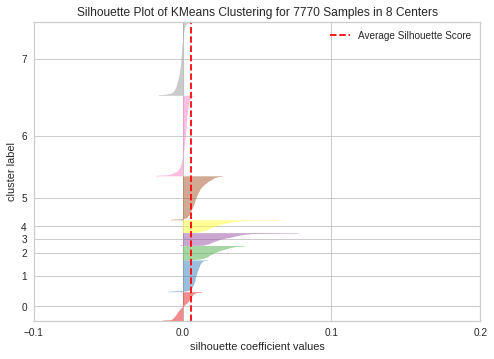

For n_clusters = 9, silhouette score is 0.005538054493019302


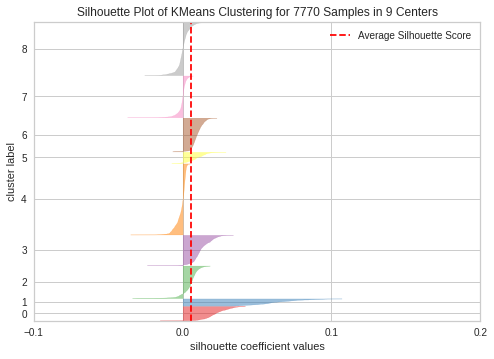

For n_clusters = 10, silhouette score is 0.005675363522968466


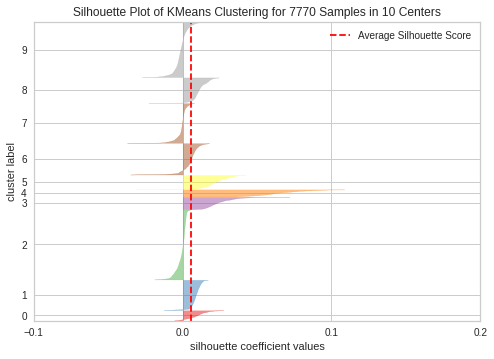

For n_clusters = 11, silhouette score is 0.006100011712560611


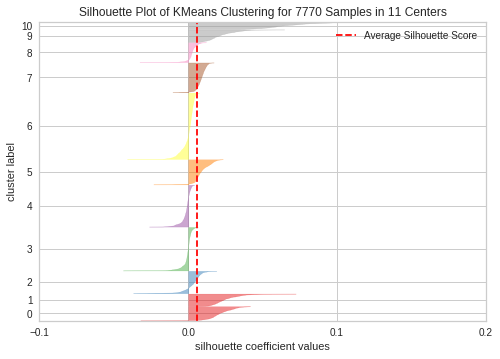

For n_clusters = 12, silhouette score is 0.006249400404526546


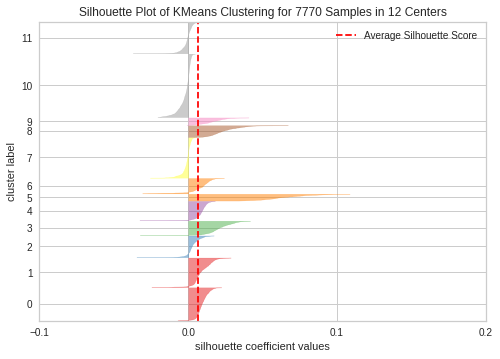

For n_clusters = 13, silhouette score is 0.006763514456040729


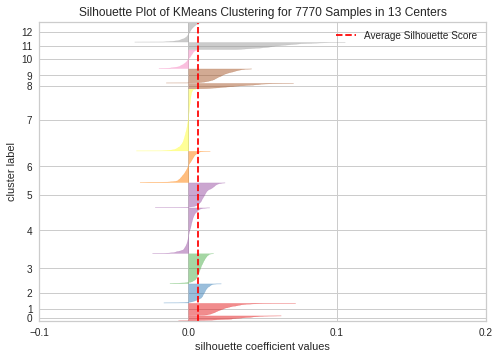

For n_clusters = 14, silhouette score is 0.006511523549925806


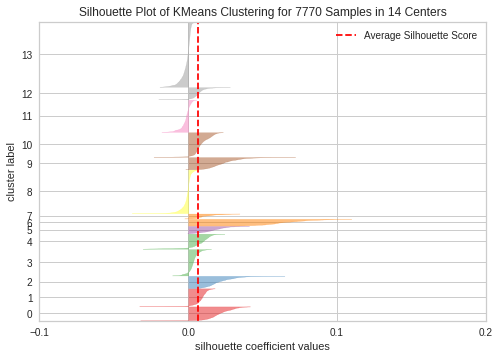

For n_clusters = 15, silhouette score is 0.005516143087294644


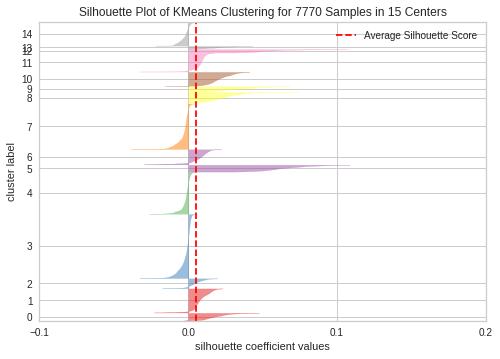

For n_clusters = 16, silhouette score is 0.006786074313056253


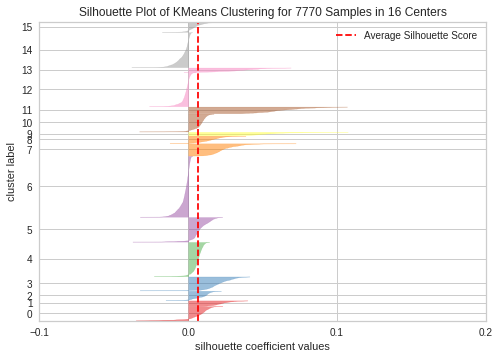

For n_clusters = 17, silhouette score is 0.007462935859315744


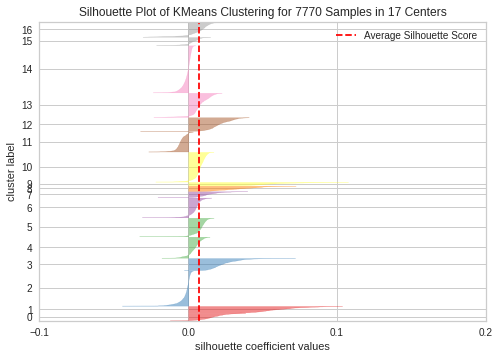

For n_clusters = 18, silhouette score is 0.0071030398309007165


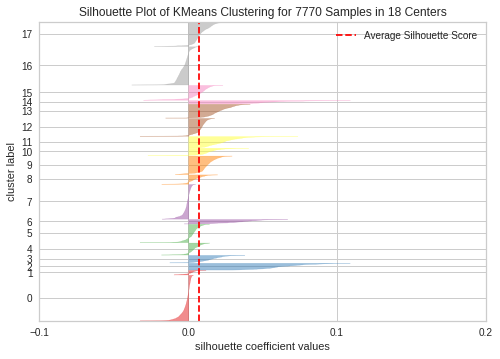

For n_clusters = 19, silhouette score is 0.006396283888182606


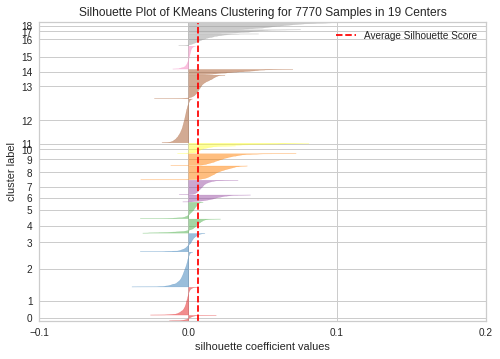

For n_clusters = 20, silhouette score is 0.005414776619067895


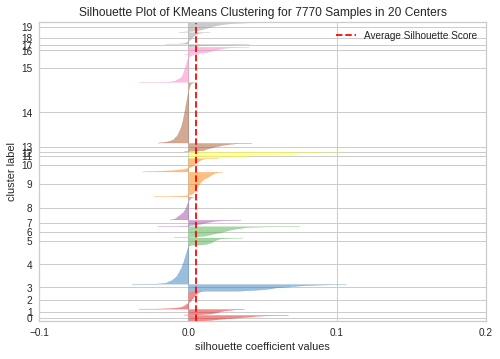

For n_clusters = 21, silhouette score is 0.0065541615624685


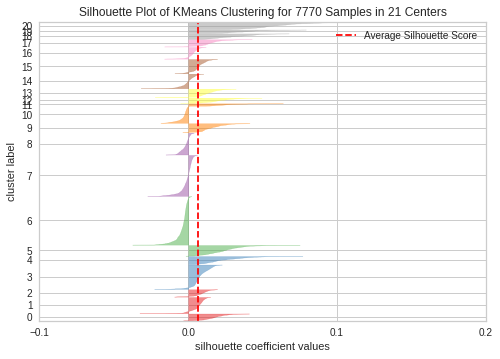

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data
      
silhouette_score_analysis(22)


###Elbow method to find optimum k value:


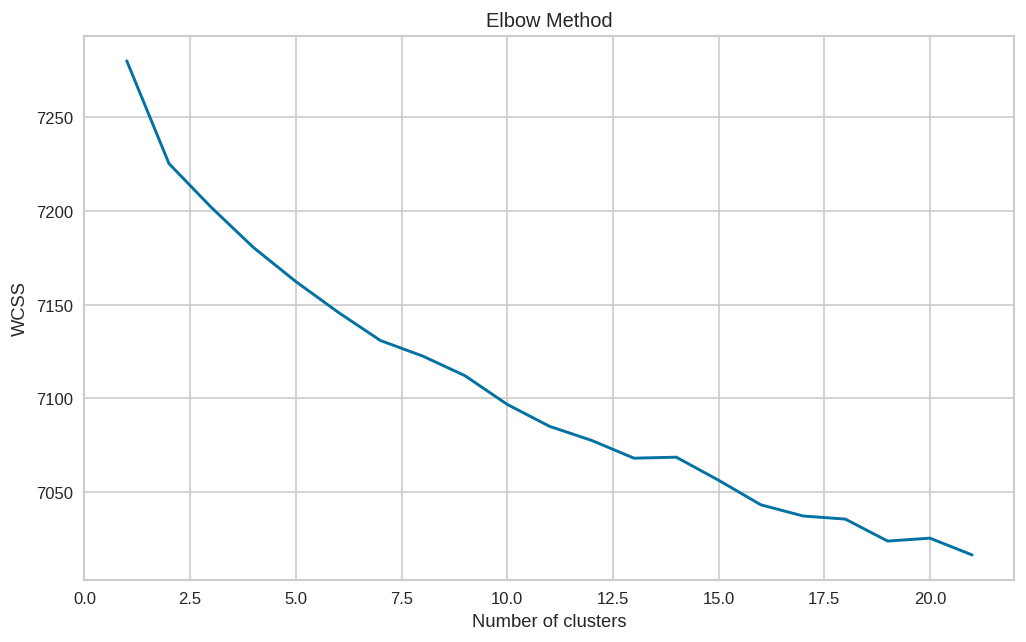

In [60]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


###Perform Clustering considering k=10.


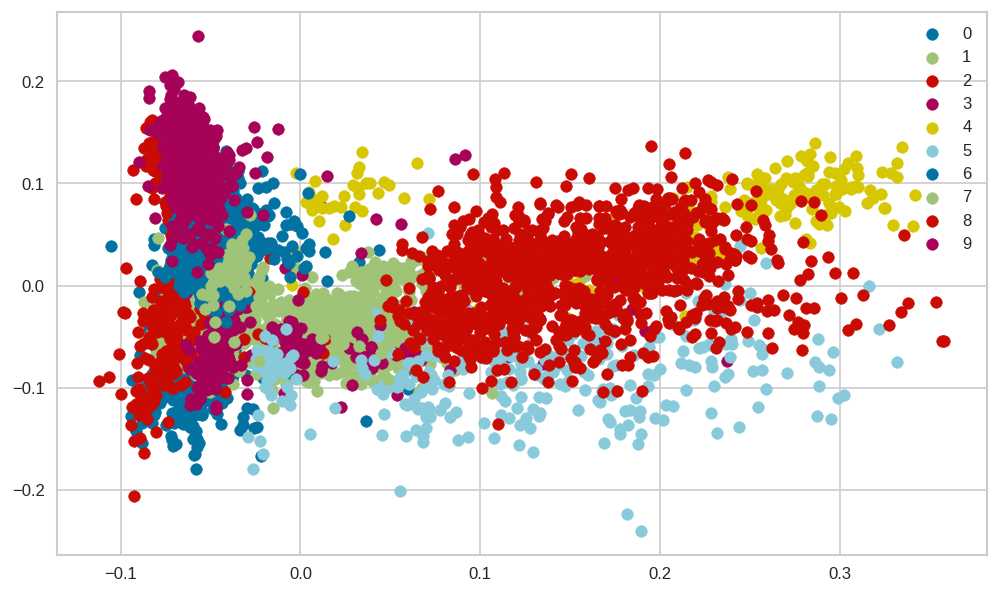

In [61]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predicting the labels of clusters.
label = kmeans.fit_predict(X_transformed)
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [84]:
# Add cluster values to the dateframe.
netflix_data['cluster_number'] = kmeans.labels_

In [85]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [86]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = netflix_data[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plotting the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

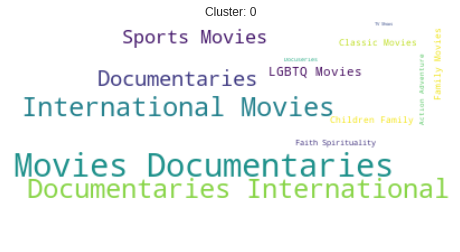

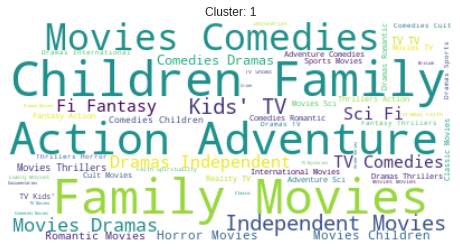

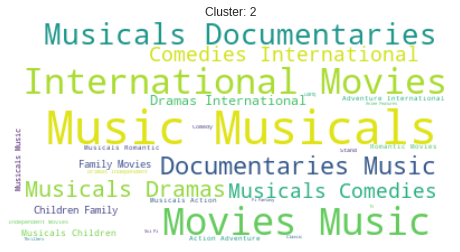

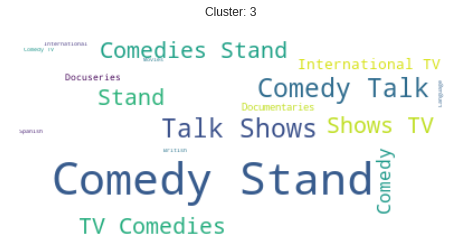

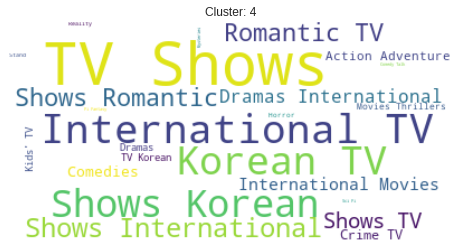

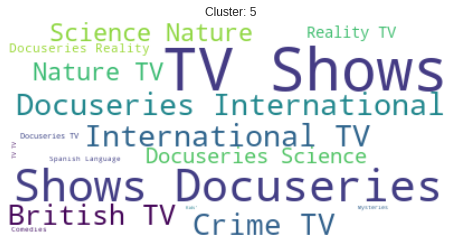

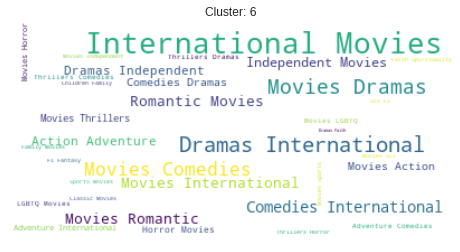

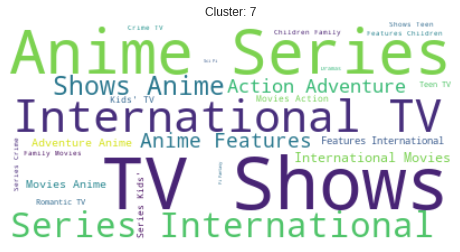

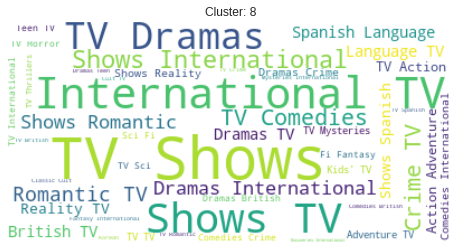

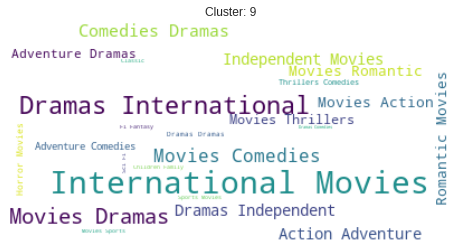

In [87]:
for i in range(10):
  func_select_Category(i,'listed_in')

#Get Recommendations:


In [88]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.05131566, 0.01994169, ..., 0.00533143, 0.02253936,
        0.00320396],
       [0.05131566, 1.        , 0.00549713, ..., 0.05254157, 0.0020932 ,
        0.00369168],
       [0.01994169, 0.00549713, 1.        , ..., 0.00758132, 0.00209997,
        0.        ],
       ...,
       [0.00533143, 0.05254157, 0.00758132, ..., 1.        , 0.00288681,
        0.20715934],
       [0.02253936, 0.0020932 , 0.00209997, ..., 0.00288681, 1.        ,
        0.02478001],
       [0.00320396, 0.00369168, 0.        , ..., 0.20715934, 0.02478001,
        1.        ]])

In [89]:
indices = pd.Series(cluster_dataframe.index)
indices[:5]


0       3%
1     7:19
2    23:59
3        9
4       21
Name: title, dtype: object

In [90]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_dataframe.index)[i])
        
    return recommended_movies

In [94]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Guru'), columns=['Recommendations'])
movie_recommendations.head(11)


,Recommendations
0,Kyun! Ho Gaya Na
1,Kahaani
2,Guzaarish
3,Mahabharat
4,TE3N
5,Yuva
6,Kabhi Alvida Naa Kehna
7,Jodhaa Akbar
8,Bhool Bhulaiyaa
9,Shabd


In [98]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('You'), columns=['Recommendations'])
tvshows_recommendations.head(11)

,Recommendations
0,Dancing Angels
1,Strangers from Hell
2,A Good Wife
3,Super Wings
4,Glow Up
5,The Lies Within
6,Killer Ratings
7,My Shy Boss
8,I Hear You
9,Momo Salon


#Conclusions:

- Majority of the content available on Netflix is Movies.
- From 2015 the number of movies and Tv  shows uploaded on netflix is increased considerably
- From the observations we can say that most of contents are released either in the year ending or the beginning.
- United States, India and UK are the top 3 countries that produce most of the available content on the platform.
- The top three genre that are present on Netflix are: International Movies, Dramas and Comedy
- Most of the Tv Shows last for 1 season, the average length of movies is between 90 to 120 minutes.
- TV-MA tops the charts, indicating that mature content is more popular on Netflix.
- Using the given data a simple recommender system was created using cosine_similarity and recommendations for Movies and Tv Shows were obtained.
